In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [2]:
RN8_c10_bz = np.load('results/hessian/ResNet8_CIFAR10_HA_Bezier_1_2/curve_hessian.npz')
RN26_c10_bz = np.load('results/hessian/ResNet26_CIFAR10_HA_Bezier_1_2/curve_hessian.npz')
RN38_c10_bz = np.load('results/hessian/ResNet38_CIFAR10_HA_Bezier_1_2/curve_hessian.npz')
RN65_c10_bz = np.load('results/hessian/ResNet65_CIFAR10_HA_Bezier_1_2/curve_hessian.npz')
RN119_c10_bz = np.load('results/hessian/ResNet119_CIFAR10_HA_Bezier_1_2/curve_hessian.npz')

RN8_c10_pc = np.load('results/hessian/ResNet8_CIFAR10_HA_PolyChain_1_2/curve_hessian.npz')
RN26_c10_pc = np.load('results/hessian/ResNet26_CIFAR10_HA_PolyChain_1_2/curve_hessian.npz')
RN38_c10_pc = np.load('results/hessian/ResNet38_CIFAR10_HA_PolyChain_1_2/curve_hessian.npz')
RN65_c10_pc = np.load('results/hessian/ResNet65_CIFAR10_HA_PolyChain_1_2/curve_hessian.npz')
RN119_c10_pc = np.load('results/hessian/ResNet119_CIFAR10_HA_PolyChain_1_2/curve_hessian.npz')

RN8_c100_bz = np.load('results/hessian/ResNet8_CIFAR100_HA_Bezier_1_2/curve_hessian.npz')
RN26_c100_bz = np.load('results/hessian/ResNet26_CIFAR100_HA_Bezier_1_2/curve_hessian.npz')
RN38_c100_bz = np.load('results/hessian/ResNet38_CIFAR100_HA_Bezier_1_2/curve_hessian.npz')
RN65_c100_bz = np.load('results/hessian/ResNet65_CIFAR100_HA_Bezier_1_2/curve_hessian.npz')
RN119_c100_bz = np.load('results/hessian/ResNet119_CIFAR100_HA_Bezier_1_2/curve_hessian.npz')

RN8_c100_pc = np.load('results/hessian/ResNet8_CIFAR100_HA_PolyChain_1_2/curve_hessian.npz')
RN26_c100_pc = np.load('results/hessian/ResNet26_CIFAR100_HA_PolyChain_1_2/curve_hessian.npz')
RN38_c100_pc = np.load('results/hessian/ResNet38_CIFAR100_HA_PolyChain_1_2/curve_hessian.npz')
RN65_c100_pc = np.load('results/hessian/ResNet65_CIFAR100_HA_PolyChain_1_2/curve_hessian.npz')
RN119_c100_pc = np.load('results/hessian/ResNet119_CIFAR100_HA_PolyChain_1_2/curve_hessian.npz')

models_cifar10 = [
    ('RN8', RN8_c10_bz, RN8_c10_pc),
    ('RN26', RN26_c10_bz, RN26_c10_pc),
    ('RN38', RN38_c10_bz, RN38_c10_pc),
    ('RN65', RN65_c10_bz, RN65_c10_pc),
    ('RN119', RN119_c10_bz, RN119_c10_pc),
]

models_cifar100 = [
    ('RN8', RN8_c100_bz, RN8_c100_pc),
    ('RN26', RN26_c100_bz, RN26_c100_pc),
    ('RN38', RN38_c100_bz, RN38_c100_pc),
    ('RN65', RN65_c100_bz, RN65_c100_pc),
    ('RN119', RN119_c100_bz, RN119_c100_pc),
]


In [3]:
def summarize_models(models):
    
    # ---- Accuracy mean/min/max ----
    df_bez = pd.DataFrame({name: bz['te_acc'] for name, bz, _ in models}).T
    df_poly = pd.DataFrame({name: pc['te_acc'] for name, _, pc in models}).T
    
    df_bez = df_bez.agg(['mean','min','max'], axis=1).map(lambda x: f"{x:.2f}%")
    df_poly = df_poly.agg(['mean','min','max'], axis=1).map(lambda x: f"{x:.2f}%")
    
    
    # ---- AUC + Peak height ----
    def compute_metrics(df):
        ts = df['ts']
        te = df['te_acc']
        auc = np.max(te) - np.trapezoid(te, ts)
        peak = np.max(te) - np.min(te)
        norm_peak = peak / (np.mean(te))
        smoothness = np.sqrt(np.mean(((te[2:] - 2 * te[1:-1] + te[:-2]) / (ts[2:] - ts[:-2])**2)**2))
        return pd.Series({'auc': auc, 'peak_height': peak, 'norm_peak': norm_peak, 'smoothness': smoothness})

    df_bez_auc = pd.DataFrame({name: compute_metrics(bz) for name, bz, _ in models}).T
    df_poly_auc = pd.DataFrame({name: compute_metrics(pc) for name, _, pc in models}).T
    
    df_bez_auc['AUC'] = df_bez_auc['auc'].map(lambda x: f"{x:.4f}")
    df_bez_auc['PeakHeight'] = df_bez_auc['peak_height'].map(lambda x: f"{x:.2f}%")
    df_bez_auc['NormPeak'] = df_bez_auc['norm_peak'].map(lambda x: f"{x:.4f}")
    df_bez_auc['Smoothness'] = df_bez_auc['smoothness'].map(lambda x: f"{x:.4f}")

    df_poly_auc['AUC'] = df_poly_auc['auc'].map(lambda x: f"{x:.4f}")
    df_poly_auc['PeakHeight'] = df_poly_auc['peak_height'].map(lambda x: f"{x:.2f}%")
    df_poly_auc['NormPeak'] = df_poly_auc['norm_peak'].map(lambda x: f"{x:.4f}")
    df_poly_auc['Smoothness'] = df_poly_auc['smoothness'].map(lambda x: f"{x:.4f}")
    # ---- Return all four tables ----
    return df_bez, df_poly, df_bez_auc[['AUC','PeakHeight','NormPeak','Smoothness']], df_poly_auc[['AUC','PeakHeight','NormPeak','Smoothness']]

In [4]:

bez_c10_table, poly_c10_table, bez_c10_auc_table, poly_c10_auc_table = summarize_models(models_cifar10)
bez_c100_table, poly_c100_table, bez_c100_auc_table, poly_c100_auc_table = summarize_models(models_cifar100)

#########################
# CIFAR 10
print("-"*50)
print("CIFAR10")
print("-"*50,"\n")
print("Bezier accuracy:")
display(bez_c10_table)

print("PolyChain accuracy:")
display(poly_c10_table)

print("Bezier AUC + Peak Height:")
display(bez_c10_auc_table)

print("PolyChain AUC + Peak Height:")
display(poly_c10_auc_table)

#########################
# CIFAR 100
print("-"*50)
print("CIFAR100")
print("-"*50,"\n")
print("Bezier accuracy:")
display(bez_c100_table)

print("PolyChain accuracy:")
display(poly_c100_table)

print("Bezier AUC + Peak Height:")
display(bez_c100_auc_table)

print("PolyChain AUC + Peak Height:")
display(poly_c100_auc_table)


--------------------------------------------------
CIFAR10
-------------------------------------------------- 

Bezier accuracy:


,mean,min,max
RN8,85.55%,84.08%,87.50%
RN26,91.59%,90.76%,92.64%
RN38,92.15%,91.17%,93.03%
RN65,93.07%,92.24%,94.05%
RN119,93.72%,93.23%,94.06%


PolyChain accuracy:


,mean,min,max
RN8,85.33%,84.19%,87.42%
RN26,91.41%,90.03%,92.49%
RN38,92.13%,91.19%,93.08%
RN65,92.89%,92.02%,93.92%
RN119,93.47%,92.68%,94.12%


Bezier AUC + Peak Height:


,AUC,PeakHeight,NormPeak,Smoothness
RN8,2.0427,3.42%,0.0400,35.2039
RN26,1.0835,1.88%,0.0205,44.0962
RN38,0.9105,1.86%,0.0202,50.4970
RN65,1.0067,1.81%,0.0194,42.9044
RN119,0.3522,0.83%,0.0089,44.2428


PolyChain AUC + Peak Height:


,AUC,PeakHeight,NormPeak,Smoothness
RN8,2.1885,3.23%,0.0379,54.5604
RN26,1.1147,2.46%,0.0269,45.8585
RN38,0.9938,1.89%,0.0205,39.8140
RN65,1.0635,1.90%,0.0205,55.5930
RN119,0.6668,1.44%,0.0154,38.2898


--------------------------------------------------
CIFAR100
-------------------------------------------------- 

Bezier accuracy:


,mean,min,max
RN8,55.94%,53.08%,59.69%
RN26,67.07%,64.84%,69.82%
RN38,68.97%,67.10%,71.06%
RN65,72.37%,71.42%,73.76%
RN119,73.69%,72.36%,74.88%


PolyChain accuracy:


,mean,min,max
RN8,55.66%,53.11%,59.59%
RN26,66.92%,64.51%,69.38%
RN38,68.99%,67.53%,70.83%
RN65,72.36%,71.29%,73.21%
RN119,73.68%,71.19%,74.76%


Bezier AUC + Peak Height:


,AUC,PeakHeight,NormPeak,Smoothness
RN8,3.9255,6.61%,0.1182,69.1265
RN26,2.8562,4.98%,0.0743,67.3776
RN38,2.1533,3.96%,0.0574,59.7151
RN65,1.4248,2.34%,0.0323,63.6305
RN119,1.2313,2.52%,0.0342,90.2400


PolyChain AUC + Peak Height:


,AUC,PeakHeight,NormPeak,Smoothness
RN8,4.1118,6.48%,0.1164,70.9707
RN26,2.5685,4.87%,0.0728,100.0013
RN38,1.8987,3.30%,0.0478,101.4596
RN65,0.8830,1.92%,0.0265,61.3085
RN119,1.1235,3.57%,0.0485,170.2262


In [5]:
def plot_model_curves(models, type="te", title="Curve Test Accuracy for ResNet Models on CIFAR-10"):
    fig, axs = plt.subplots(1, 2, figsize=(14,5), sharey=True)

    # ---- Left: Bezier curves ----
    for name, bz, _ in models:
        ts = bz['ts']
        acc = bz[f'{type}_acc']
        axs[0].plot(ts, acc, label=name)

    axs[0].set_xlabel('t (Path Parameter)')
    if type == "te":
        axs[0].set_ylabel('Test Accuracy (%)')
    elif type == "tr":
        axs[0].set_ylabel('Train Accuracy (%)')
    axs[0].set_title('Bezier')
    axs[0].legend()

    # ---- Right: PolyChain curves ----
    for name, _, pc in models:
        ts = pc['ts']
        acc = pc[f'{type}_acc']
        axs[1].plot(ts, acc, label=name)

    axs[1].set_xlabel('t (Path Parameter)')
    axs[1].set_title('PolyChain')
    axs[1].legend()

    # ---- Global title / layout ----
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

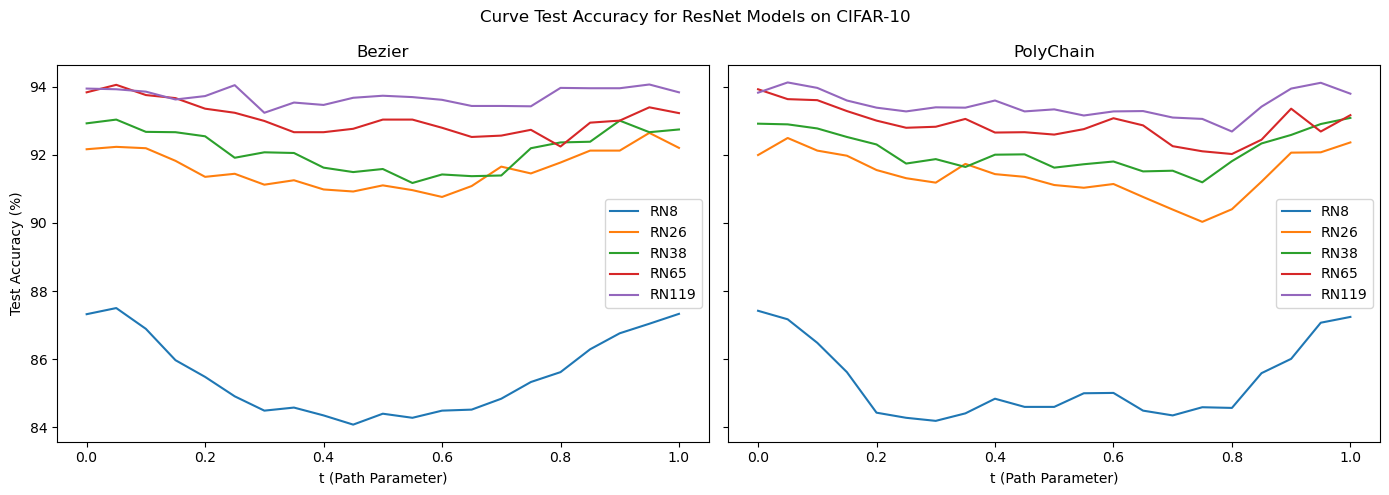

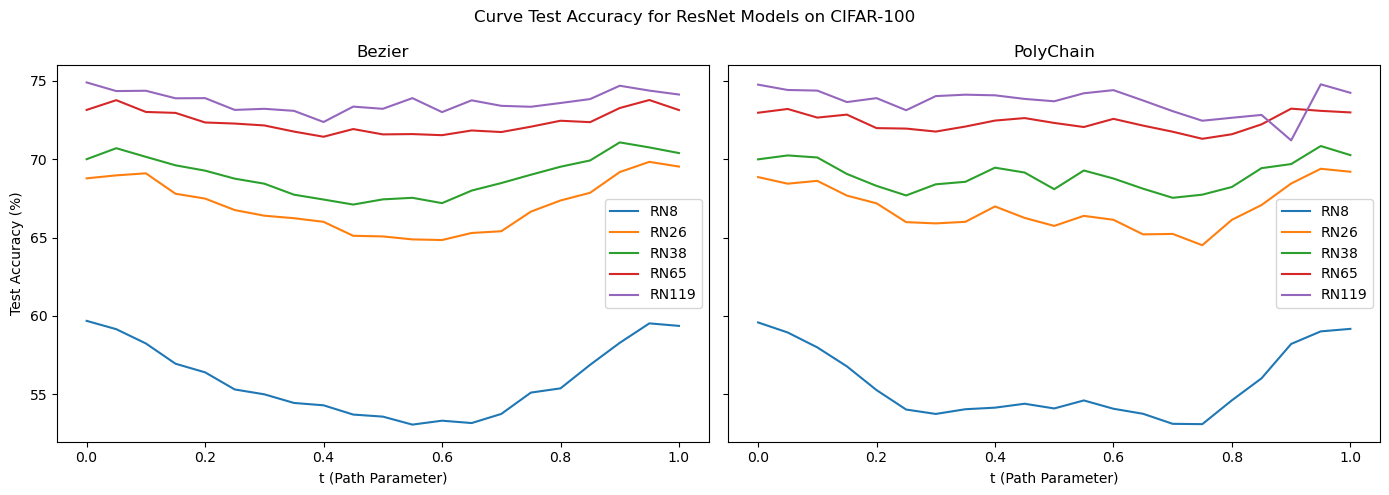

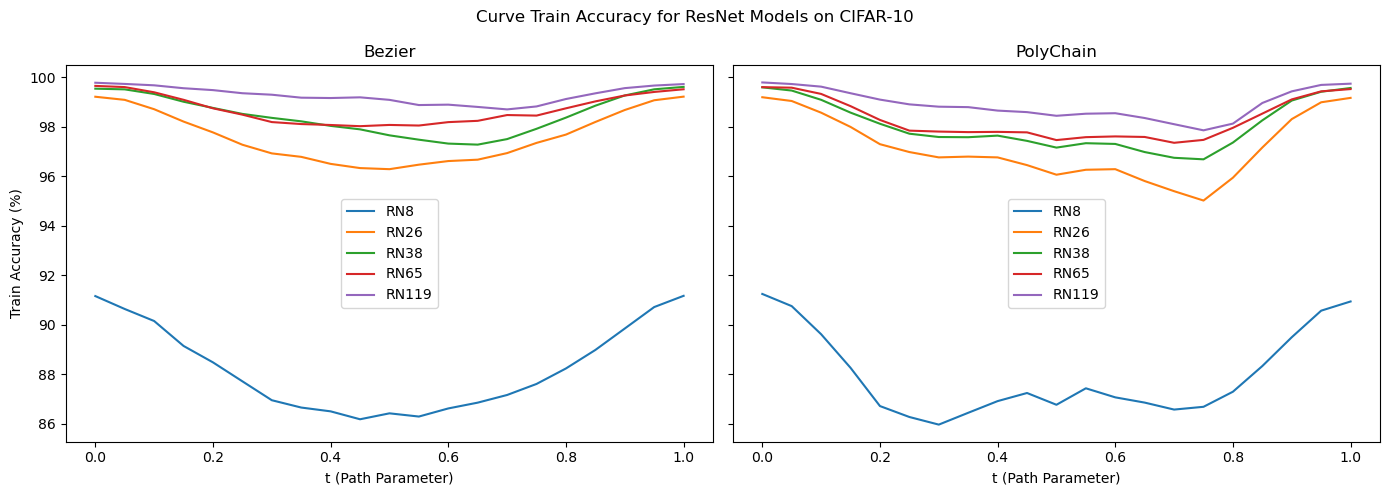

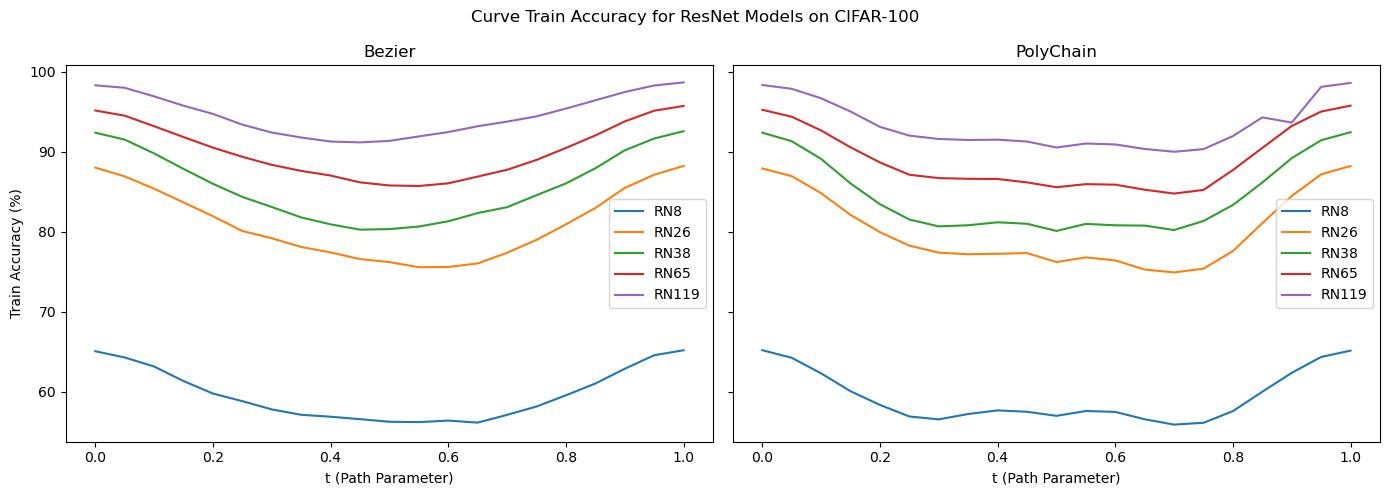

In [6]:
plot_model_curves(models_cifar10, type="te", title="Curve Test Accuracy for ResNet Models on CIFAR-10")
plot_model_curves(models_cifar100, type="te", title="Curve Test Accuracy for ResNet Models on CIFAR-100")
plot_model_curves(models_cifar10, type="tr", title="Curve Train Accuracy for ResNet Models on CIFAR-10")
plot_model_curves(models_cifar100, type="tr", title="Curve Train Accuracy for ResNet Models on CIFAR-100")

In [7]:
# #Open angles/angle_data.csv as pandas dataframe
angle_df = pd.read_csv('results/angles/angle_data.csv', delimiter=';')
cifar10_df = angle_df[angle_df['dataset'] == 'CIFAR10']
cifar100_df = angle_df[angle_df['dataset'] == 'CIFAR100']

print("CIFAR10 Data:")
display(cifar10_df)

print("CIFAR100 Data:")
display(cifar100_df)


CIFAR10 Data:


,dataset,model,AC_norm,BC_norm,angle_rad,angle_deg
0,CIFAR10,ResNet8,38.75229,38.68528,1.211135,69.392947
1,CIFAR10,ResNet26,49.15702,48.49026,1.087526,62.310644
2,CIFAR10,ResNet38,49.77663,53.36667,1.095705,62.779255
3,CIFAR10,ResNet65,50.40259,49.95597,0.993303,56.912052
4,CIFAR10,ResNet119,51.88686,54.48196,0.962648,55.155670


CIFAR100 Data:


,dataset,model,AC_norm,BC_norm,angle_rad,angle_deg
5,CIFAR100,ResNet8,58.72358,59.81335,1.234761,70.746611
6,CIFAR100,ResNet26,76.24537,78.02316,1.200143,68.763103
7,CIFAR100,ResNet38,85.79421,84.68199,1.224831,70.177646
8,CIFAR100,ResNet65,70.44422,72.94723,1.150420,65.914206


In [8]:
rn18_cifar10_convex = np.loadtxt('results/convex_combo/ResNet8_CIFAR10_convex.csv', delimiter=',', skiprows=1)
rn26_cifar10_convex = np.loadtxt('results/convex_combo/ResNet26_CIFAR10_convex.csv', delimiter=',', skiprows=1)
rn38_cifar10_convex = np.loadtxt('results/convex_combo/ResNet38_CIFAR10_convex.csv', delimiter=',', skiprows=1)
rn65_cifar10_convex = np.loadtxt('results/convex_combo/ResNet65_CIFAR10_convex.csv', delimiter=',', skiprows=1)
rn119_cifar10_convex = np.loadtxt('results/convex_combo/ResNet119_CIFAR10_convex.csv', delimiter=',', skiprows=1)

rn18_cifar100_convex = np.loadtxt('results/convex_combo/ResNet8_CIFAR100_convex.csv', delimiter=',', skiprows=1)
rn26_cifar100_convex = np.loadtxt('results/convex_combo/ResNet26_CIFAR100_convex.csv', delimiter=',', skiprows=1)
rn38_cifar100_convex = np.loadtxt('results/convex_combo/ResNet38_CIFAR100_convex.csv', delimiter=',', skiprows=1)
rn65_cifar100_convex = np.loadtxt('results/convex_combo/ResNet65_CIFAR100_convex.csv', delimiter=',', skiprows=1)
rn119_cifar100_convex = np.loadtxt('results/convex_combo/ResNet119_CIFAR100_convex.csv', delimiter=',', skiprows=1)

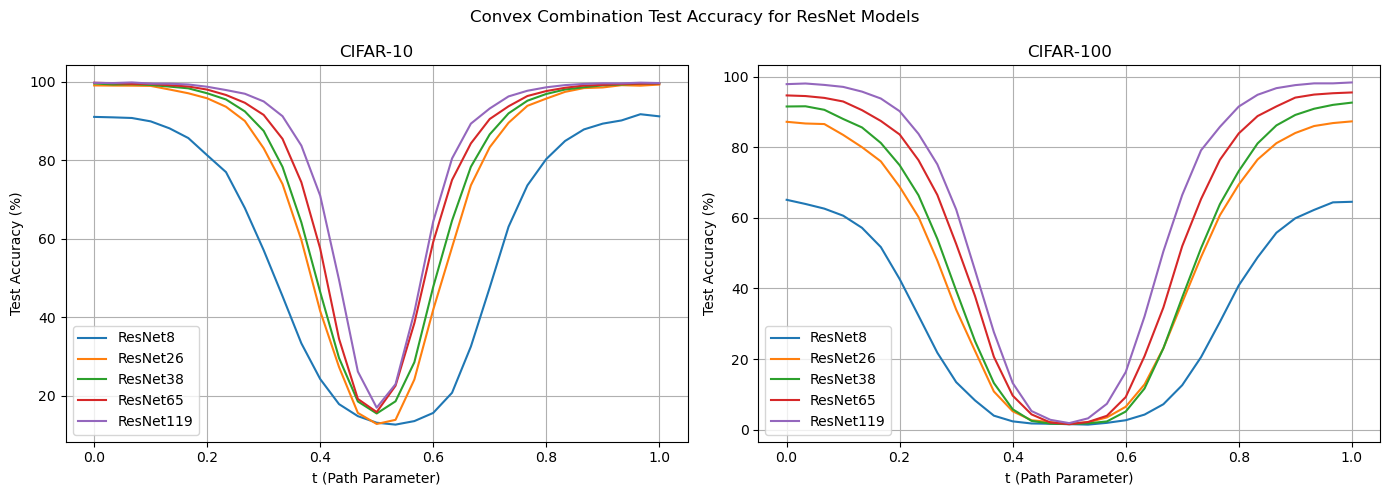

In [9]:

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# --- Left plot: CIFAR-10 ---
axs[0].plot(rn18_cifar10_convex[:,0], rn18_cifar10_convex[:,2], label='ResNet8')
axs[0].plot(rn26_cifar10_convex[:,0], rn26_cifar10_convex[:,2], label='ResNet26')
axs[0].plot(rn38_cifar10_convex[:,0], rn38_cifar10_convex[:,2], label='ResNet38')
axs[0].plot(rn65_cifar10_convex[:,0], rn65_cifar10_convex[:,2], label='ResNet65')
axs[0].plot(rn119_cifar10_convex[:,0], rn119_cifar10_convex[:,2], label='ResNet119')

axs[0].legend()
axs[0].set_xlabel('t (Path Parameter)')
axs[0].set_ylabel('Test Accuracy (%)')
axs[0].set_title('CIFAR-10')
axs[0].grid(True)

# --- Right plot: CIFAR-100 ---
axs[1].plot(rn18_cifar100_convex[:,0], rn18_cifar100_convex[:,2], label='ResNet8')
axs[1].plot(rn26_cifar100_convex[:,0], rn26_cifar100_convex[:,2], label='ResNet26')
axs[1].plot(rn38_cifar100_convex[:,0], rn38_cifar100_convex[:,2], label='ResNet38')
axs[1].plot(rn65_cifar100_convex[:,0], rn65_cifar100_convex[:,2], label='ResNet65')
axs[1].plot(rn119_cifar100_convex[:,0], rn119_cifar100_convex[:,2], label='ResNet119')

axs[1].legend()
axs[1].set_xlabel('t (Path Parameter)')
axs[1].set_ylabel('Test Accuracy (%)')
axs[1].set_title('CIFAR-100')
axs[1].grid(True)

fig.suptitle('Convex Combination Test Accuracy for ResNet Models')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import os


models_cifar10

t_points = npzfile['ts']
gen_gap = npzfile['gen_gap']
hess_lambda = npzfile['hess_lambda']
hess_trace = npzfile['hess_trace']
hess_topk = npzfile['hess_topk']

print(npzfile['te_acc'])

print(hess_trace)

# Example: Print the first few points
print("T-values (Loss/Acc):", t_points[:5])
print("Generalization gap:", gen_gap[:5])
print("Sharpness:", hess_lambda[:5])
print("Hessian top1:", hess_topk[:5, 0])
print("Hessian trace:", hess_trace[:5])

import matplotlib.pyplot as plt

# Create subplots (3 rows, 1 column)
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
plt.suptitle(f"{MODEL}_{DATASET}_HA_Bezier_1_2/curve_hessian_21.npz")
# Plot each variable in a separate subplot
axs[0].plot(t_points, gen_gap, label='Generalization gap')
axs[0].set_ylabel('Generalization gap')
axs[0].legend()

axs[1].plot(t_points, hess_lambda, label='Sharpness')
axs[1].plot(t_points, hess_topk[:, 0], label='Sharpness (top1)')
axs[1].plot(t_points, np.mean(hess_topk[:, :], axis=1), label='Sharpness (top5 mean)')
axs[1].set_ylabel('Sharpness')
axs[1].legend()

axs[2].plot(t_points, hess_trace, label='Hessian trace')
axs[2].set_xlabel('T-value')
axs[2].set_ylabel('Hessian trace')
axs[2].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
def plot_model_curves_hessian(models, type="te", title="Curve Test Accuracy for ResNet Models on CIFAR-10"):
    fig, axs = plt.subplots(1, 2, figsize=(14,5), sharey=True)

    # ---- Left: Bezier curves ----
    for name, bz, _ in models:
        ts = bz['ts']
        acc = bz[f'{type}_acc']
        axs[0].plot(ts, acc, label=name)

    axs[0].set_xlabel('t (Path Parameter)')
    if type == "te":
        axs[0].set_ylabel('Test Accuracy (%)')
    elif type == "tr":
        axs[0].set_ylabel('Train Accuracy (%)')
    axs[0].set_title('Bezier')
    axs[0].legend()

    # ---- Right: PolyChain curves ----
    for name, _, pc in models:
        ts = pc['ts']
        acc = pc[f'{type}_acc']
        axs[1].plot(ts, acc, label=name)

    axs[1].set_xlabel('t (Path Parameter)')
    axs[1].set_title('PolyChain')
    axs[1].legend()

    # ---- Global title / layout ----
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

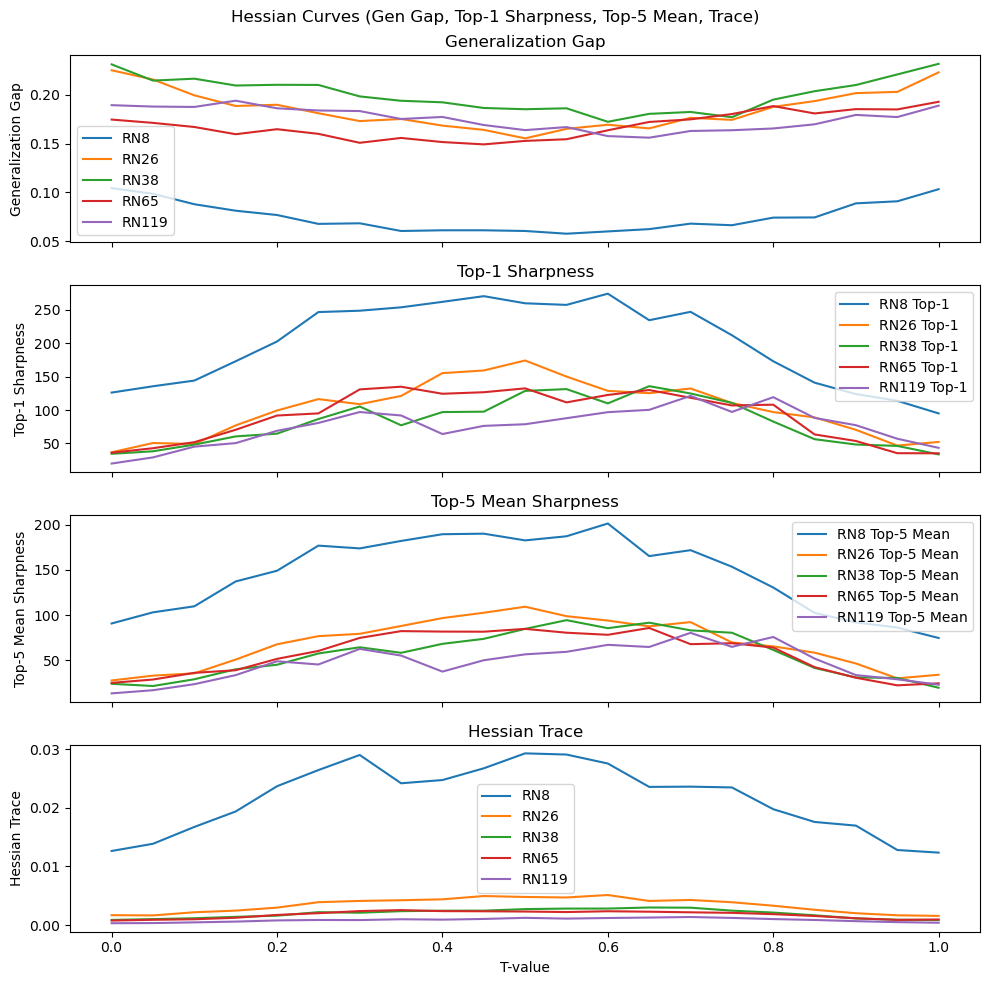

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_model_curves_hessian(models, title="Hessian Curves (Gen Gap, Top-1 Sharpness, Top-5 Mean, Trace)"):
    # Create subplots (4 rows, 1 column)
    fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
    fig.suptitle(title)
    
    # ---- Generalization Gap (Top-left) ----
    axs[0].set_title('Generalization Gap')
    for name, bz, _ in models:
        ts = bz['ts']
        gen_gap = bz['gen_gap']  # Assuming `gen_gap` is available in the bz data
        axs[0].plot(ts, gen_gap, label=name)

    axs[0].set_ylabel('Generalization Gap')
    axs[0].legend()

    # ---- Top-1 Sharpness (Bottom-left) ----
    axs[1].set_title('Top-1 Sharpness')
    for name, bz, _ in models:
        ts = bz['ts']
        hess_topk = bz['hess_topk']  # Assuming `hess_topk` is available in bz data
        axs[1].plot(ts, hess_topk[:, 0], label=f'{name} Top-1')

    axs[1].set_ylabel('Top-1 Sharpness')
    axs[1].legend()

    # ---- Top-5 Mean Sharpness (Bottom-middle) ----
    axs[2].set_title('Top-5 Mean Sharpness')
    for name, bz, _ in models:
        ts = bz['ts']
        hess_topk = bz['hess_topk']  # Assuming `hess_topk` is available in bz data
        axs[2].plot(ts, np.mean(hess_topk[:, :5], axis=1), label=f'{name} Top-5 Mean')

    axs[2].set_ylabel('Top-5 Mean Sharpness')
    axs[2].legend()

    # ---- Hessian Trace (Bottom-right) ----
    axs[3].set_title('Hessian Trace')
    for name, bz, _ in models:
        ts = bz['ts']
        hess_trace = bz['hess_trace']  # Assuming `hess_trace` is available in bz data
        axs[3].plot(ts, hess_trace, label=name)

    axs[3].set_xlabel('T-value')
    axs[3].set_ylabel('Hessian Trace')
    axs[3].legend()

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()


plot_model_curves_hessian(models_cifar10)


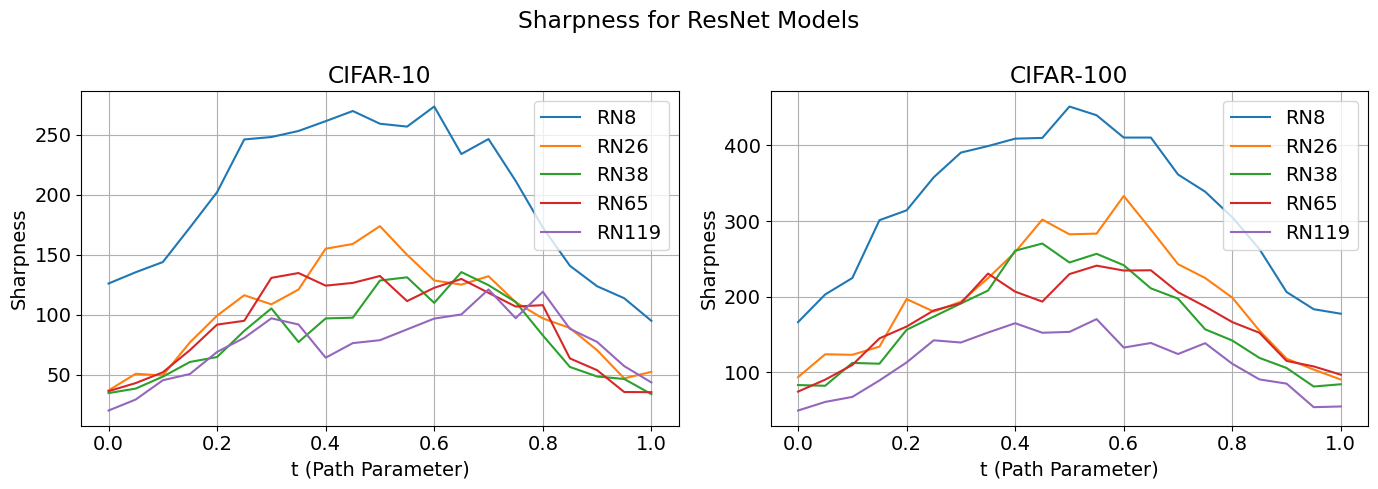

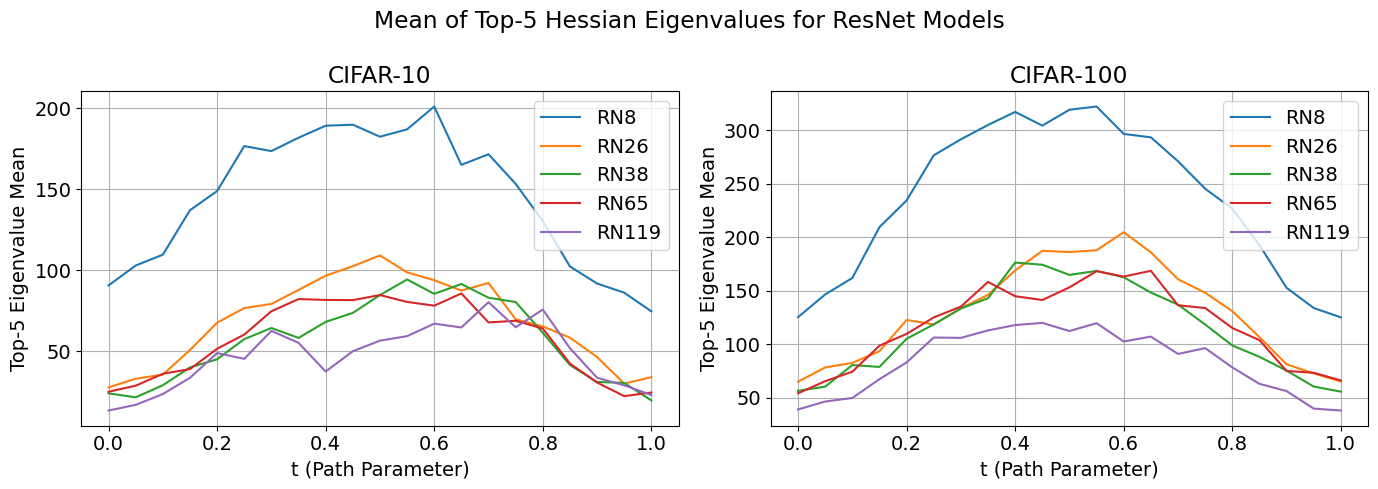

In [55]:
import matplotlib.pyplot as plt
import numpy as np

def plot_topk_sharpness(models_cifar10, models_cifar100, K=1, title="Sharpness for ResNet Models", ylab="Sharpness"):
    # Create subplots (1 row, 2 columns)
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Plot for CIFAR-10
    for name, bz, _ in models_cifar10:
        # Extract top-1 sharpness from Bezier data
        ts = bz['ts']  # Path parameter
        hess_topk = bz['hess_topk']  # Top-k sharpness values

        # Extract top-1 sharpness (first column of hess_topk)
        topk_sharpness = np.mean(hess_topk[:, :K], 1)  # Top-K sharpness (avg of first K columns)

        # Plot on CIFAR-10 subplot
        axs[0].plot(ts, topk_sharpness, label=name)

    # Configure the CIFAR-10 plot
    axs[0].set_xlabel('t (Path Parameter)')
    axs[0].set_ylabel(ylab)
    axs[0].set_title('CIFAR-10')
    axs[0].legend()
    axs[0].grid(True)

    # Plot for CIFAR-100
    for name, bz, _ in models_cifar100:
        # Extract top-1 sharpness from Bezier data
        ts = bz['ts']  # Path parameter
        hess_topk = bz['hess_topk']  # Top-k sharpness values

        # Extract top-1 sharpness (first column of hess_topk)
        topk_sharpness = np.mean(hess_topk[:, :K], 1)  # Top-K sharpness (avg of first K columns)

        # Plot on CIFAR-100 subplot
        axs[1].plot(ts, topk_sharpness, label=name)

    # Configure the CIFAR-100 plot
    axs[1].set_xlabel('t (Path Parameter)')
    axs[1].set_ylabel(ylab)
    axs[1].set_title('CIFAR-100')
    axs[1].legend()
    axs[1].grid(True)

    # Set a global title for the whole figure
    fig.suptitle(title)
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Sharpness (Top-1)
plt.rcParams.update({'font.size': 14})
plot_topk_sharpness(models_cifar10, models_cifar100, K=1)
plt.rcParams.update({'font.size': 10}) # default

# Top-5
plt.rcParams.update({'font.size': 14})
plot_topk_sharpness(models_cifar10, models_cifar100, K=5, title="Mean of Top-5 Hessian Eigenvalues for ResNet Models", ylab="Top-5 Eigenvalue Mean")
plt.rcParams.update({'font.size': 10}) # default


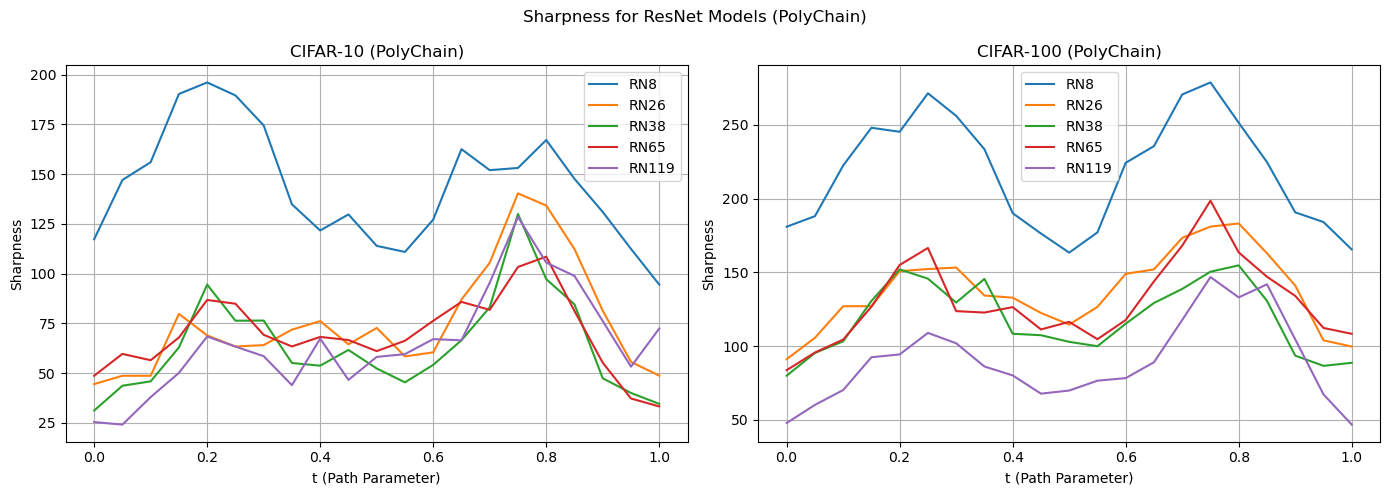

In [75]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top1_sharpness_polychain(models_cifar10, models_cifar100, title="Sharpness for ResNet Models (PolyChain)"):
    # Create subplots (1 row, 2 columns)
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Plot for CIFAR-10
    for name, _, pc in models_cifar10:
        # Extract top-1 sharpness from PolyChain data
        ts = pc['ts']  # Path parameter
        hess_topk = pc['hess_topk']  # Top-k sharpness values

        # Extract top-1 sharpness (first column of hess_topk)
        top1_sharpness = hess_topk[:, 0]  # Top-1 sharpness (first column)

        # Plot on CIFAR-10 subplot
        axs[0].plot(ts, top1_sharpness, label=name)

    # Configure the CIFAR-10 plot
    axs[0].set_xlabel('t (Path Parameter)')
    axs[0].set_ylabel('Sharpness')
    axs[0].set_title('CIFAR-10 (PolyChain)')
    axs[0].legend()
    axs[0].grid(True)

    # Plot for CIFAR-100
    for name, _, pc in models_cifar100:
        # Extract top-1 sharpness from PolyChain data
        ts = pc['ts']  # Path parameter
        hess_topk = pc['hess_topk']  # Top-k sharpness values

        # Extract top-1 sharpness (first column of hess_topk)
        top1_sharpness = hess_topk[:, 0]  # Top-1 sharpness (first column)

        # Plot on CIFAR-100 subplot
        axs[1].plot(ts[top1_sharpness<500], top1_sharpness[top1_sharpness<500], label=name)

    # Configure the CIFAR-100 plot
    axs[1].set_xlabel('t (Path Parameter)')
    axs[1].set_ylabel('Sharpness')
    axs[1].set_title('CIFAR-100 (PolyChain)')
    axs[1].legend()
    axs[1].grid(True)

    # Set a global title for the whole figure
    fig.suptitle(title)
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Example usage:
plot_top1_sharpness_polychain(models_cifar10, models_cifar100)


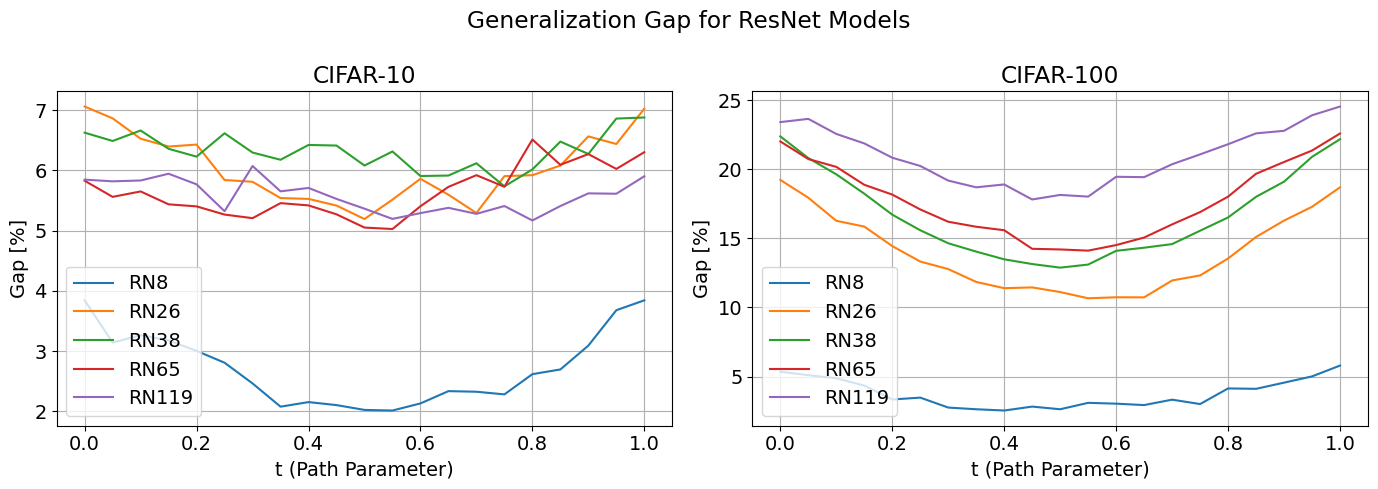

In [73]:
def plot_gen_gap(models_cifar10, models_cifar100, title="Generalization Gap for ResNet Models", ylab="Gap [%]"):
    # Create subplots (1 row, 2 columns)
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Plot for CIFAR-10
    for name, bz, _ in models_cifar10:
        # Extract top-1 sharpness from Bezier data
        ts = bz['ts']  # Path parameter
        # gen_gap = bz['gen_gap']
        gen_gap = bz['tr_acc'] - bz['te_acc']

        # Plot on CIFAR-10 subplot
        axs[0].plot(ts, gen_gap, label=name)

    # Configure the CIFAR-10 plot
    axs[0].set_xlabel('t (Path Parameter)')
    axs[0].set_ylabel(ylab)
    axs[0].set_title('CIFAR-10')
    axs[0].legend()
    axs[0].grid(True)

    # Plot for CIFAR-100
    for name, bz, _ in models_cifar100:
        # Extract top-1 sharpness from Bezier data
        ts = bz['ts']  # Path parameter
        # gen_gap = bz['gen_gap']
        gen_gap = bz['tr_acc'] - bz['te_acc']

        # Plot on CIFAR-100 subplot
        axs[1].plot(ts, gen_gap, label=name)

    # Configure the CIFAR-100 plot
    axs[1].set_xlabel('t (Path Parameter)')
    axs[1].set_ylabel(ylab)
    axs[1].set_title('CIFAR-100')
    axs[1].legend()
    axs[1].grid(True)
    # Set CIFAR-10 y-axis limits to match CIFAR-100 y-axis limits
    # ymin, ymax = axs[1].get_ylim()
    # axs[0].set_ylim(ymin, ymax)


    # Set a global title for the whole figure
    fig.suptitle(title)
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Generalization Gap
plt.rcParams.update({'font.size': 14})
plot_gen_gap(models_cifar10, models_cifar100)
plt.rcParams.update({'font.size': 10}) # default


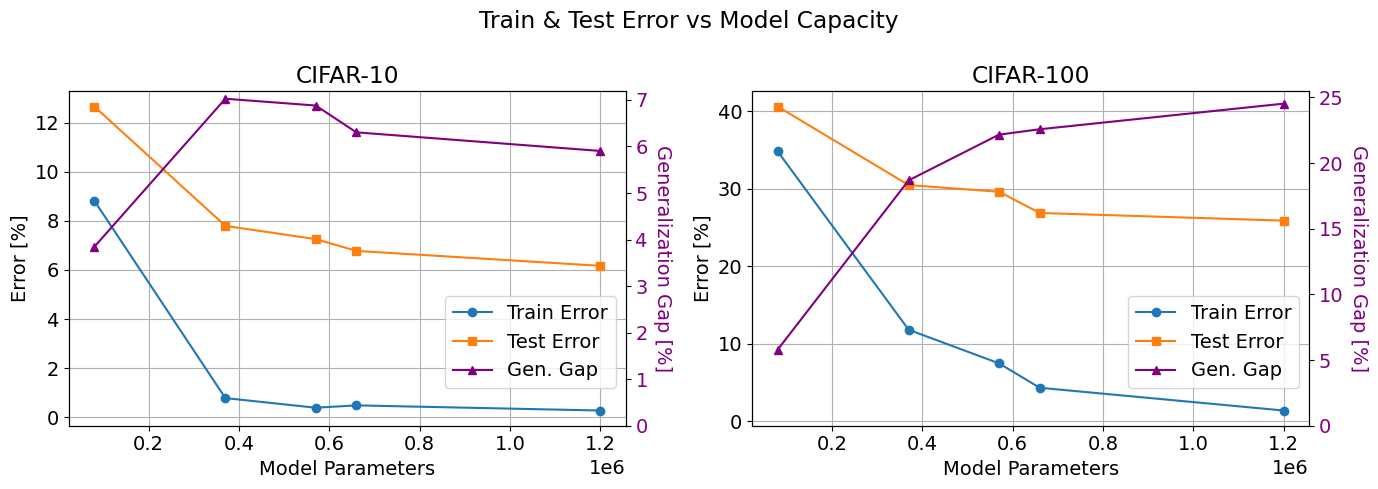

In [108]:
import matplotlib.pyplot as plt
import numpy as np

def plot_double_descent_error(models_cifar10, models_cifar100, capacities, title="Train & Test Error vs Model Capacity"):
    """
    Plots train and test error against model capacity for CIFAR-10 and CIFAR-100,
    with generalization gap on a secondary y-axis, but all legends in the same box.
    
    Parameters:
        models_cifar10: list of (name, bz, pc) tuples
        models_cifar100: list of (name, bz, pc) tuples
        capacities: array-like of model capacities (number of parameters)
    """
    # Convert accuracy (%) to error (%)
    def acc_to_error(acc):
        return 100.0 - acc
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # --- CIFAR-10 ---
    train_error_c10 = []
    test_error_c10 = []

    for name, bz, _ in models_cifar10:
        train_error_c10.append(acc_to_error(bz['tr_acc'][-1]))
        test_error_c10.append(acc_to_error(bz['te_acc'][-1]))

    # Primary axis: train/test error
    line1, = axs[0].plot(capacities, train_error_c10, marker='o', label='Train Error')
    line2, = axs[0].plot(capacities, test_error_c10, marker='s', label='Test Error')
    axs[0].set_xlabel('Model Parameters')
    axs[0].set_ylabel('Error [%]')
    axs[0].set_title('CIFAR-10')
    axs[0].grid(True)

    # Secondary axis: generalization gap
    gen_gap_c10 = -(np.array(train_error_c10) - np.array(test_error_c10))
    ax2 = axs[0].twinx()
    line3, = ax2.plot(capacities, gen_gap_c10, marker='^', color='purple', label='Gen. Gap')
    label = ax2.set_ylabel('Generalization Gap [%]', color='purple', rotation=270)
    label.set_verticalalignment('bottom')
    label.set_horizontalalignment('center')
    ax2.tick_params(axis='y', labelcolor='purple')
    ax2.set_ylim(bottom=0)

    # Combine all lines for single legend
    axs[0].legend(
        handles=[line1, line2, line3],
        loc="center right",
        bbox_to_anchor=(1.0, 0.25)
    )

    # --- CIFAR-100 ---
    train_error_c100 = []
    test_error_c100 = []

    for name, bz, _ in models_cifar100:
        train_error_c100.append(acc_to_error(bz['tr_acc'][-1]))
        test_error_c100.append(acc_to_error(bz['te_acc'][-1]))

    line1, = axs[1].plot(capacities, train_error_c100, marker='o', label='Train Error')
    line2, = axs[1].plot(capacities, test_error_c100, marker='s', label='Test Error')
    axs[1].set_xlabel('Model Parameters')
    axs[1].set_ylabel('Error [%]')
    axs[1].set_title('CIFAR-100')
    axs[1].grid(True)

    gen_gap_c100 = -(np.array(train_error_c100) - np.array(test_error_c100))
    ax2 = axs[1].twinx()
    line3, = ax2.plot(capacities, gen_gap_c100, marker='^', color='purple', label='Gen. Gap')
    label = ax2.set_ylabel('Generalization Gap [%]', color='purple', rotation=270)
    label.set_verticalalignment('bottom')
    label.set_horizontalalignment('center')
    ax2.tick_params(axis='y', labelcolor='purple')
    ax2.set_ylim(bottom=0)

    # Combine all lines for single legend
    axs[1].legend(
        handles=[line1, line2, line3],
        loc="center right",
        bbox_to_anchor=(1.0, 0.25)
    )

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()


# Example usage:
capacities = np.array([80, 370, 570, 660, 1200]) * 1e3
plt.rcParams.update({'font.size': 14})
plot_double_descent_error(models_cifar10, models_cifar100, capacities)
plt.rcParams.update({'font.size': 10})
